In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("./data/all-seasons.csv")
df.head()

,Round,Home,Score,Away,Home_Score,Away_Score,Winner_team,Winner_Home_Away,Season
0,Group stage,NK Olimpija Ljubljana,3–0,FC Norma Tallinn,3.0,0.0,NK Olimpija Ljubljana,Home,1992-1993
1,Group stage,Valletta FC,1–2,Maccabi Tel Aviv FC,1.0,2.0,Maccabi Tel Aviv FC,Away,1992-1993
2,Group stage,Away,1–3,Skonto FC,1.0,3.0,Skonto FC,Away,1992-1993
3,Group stage,Shelbourne FC,0–0,Tavriya Simferopol,0.0,0.0,Draw,Draw,1992-1993
4,Group stage,FC Norma Tallinn,0–2,NK Olimpija Ljubljana,0.0,2.0,NK Olimpija Ljubljana,Away,1992-1993


In [3]:
## Remove the final games (as there are no home and away)
df_finals = df[df["Round"] == "Final"]
df_finals.head()

,Round,Home,Score,Away,Home_Score,Away_Score,Winner_team,Winner_Home_Away,Season
81,Final,Marseille,1–0,Milan,1.0,0.0,Marseille,Home,1992-1993
175,Final,Milan,4–0,Barcelona,4.0,0.0,Milan,Home,1993-1994
236,Final,Ajax,1–0,Milan,1.0,0.0,Ajax,Home,1994-1995
357,Final,Dortmund,3–1,Juventus,3.0,1.0,Dortmund,Home,1996-1997
442,Final,Juventus,0–1,Real Madrid,0.0,1.0,Real Madrid,Away,1997-1998


In [4]:
df_finals.shape

(26, 9)

In [5]:
df.shape

(3758, 9)

In [6]:
df = df[df["Round"] != "Final"]
df.shape

(3732, 9)

In [7]:
home_or_away = df["Winner_Home_Away"].value_counts()
home_or_away

Winner_Home_Away
Home    1823
Away    1039
Draw     870
Name: count, dtype: int64

In [8]:
home_wins = home_or_away.iloc[0]
away_wins = home_or_away.iloc[1]
draws = home_or_away.iloc[2]
total = df.shape[0]

In [9]:
print(
    "Percentage of home wins in 3732 champions "
    + f"league matches = {round((home_wins/total)*100)}%"
)

Percentage of home wins in 3732 champions league matches = 49%


In [10]:
print(
    "Percentage of away wins in 3732 champions "
    + f"league matches = {round((away_wins/total)*100)}%"
)

Percentage of away wins in 3732 champions league matches = 28%


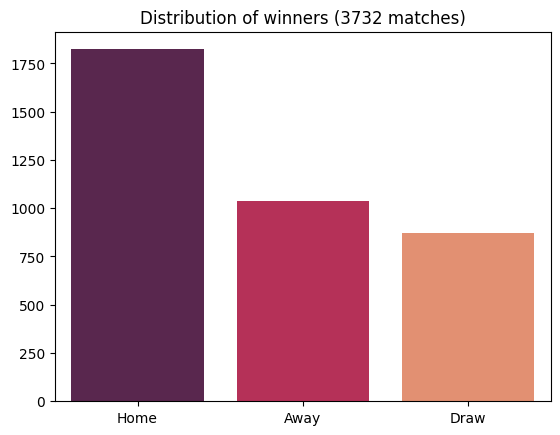

In [11]:
sns.countplot(data=df, x="Winner_Home_Away", palette="rocket")
plt.xlabel("")
plt.ylabel("")
plt.title("Distribution of winners (3732 matches)")
plt.show()

In [12]:
print(
    f"Home team has a {round(((home_wins-away_wins)/away_wins)*100)}%"
    + " chance of winning compared to away team winning"
)

Home team has a 75% chance of winning compared to away team winning


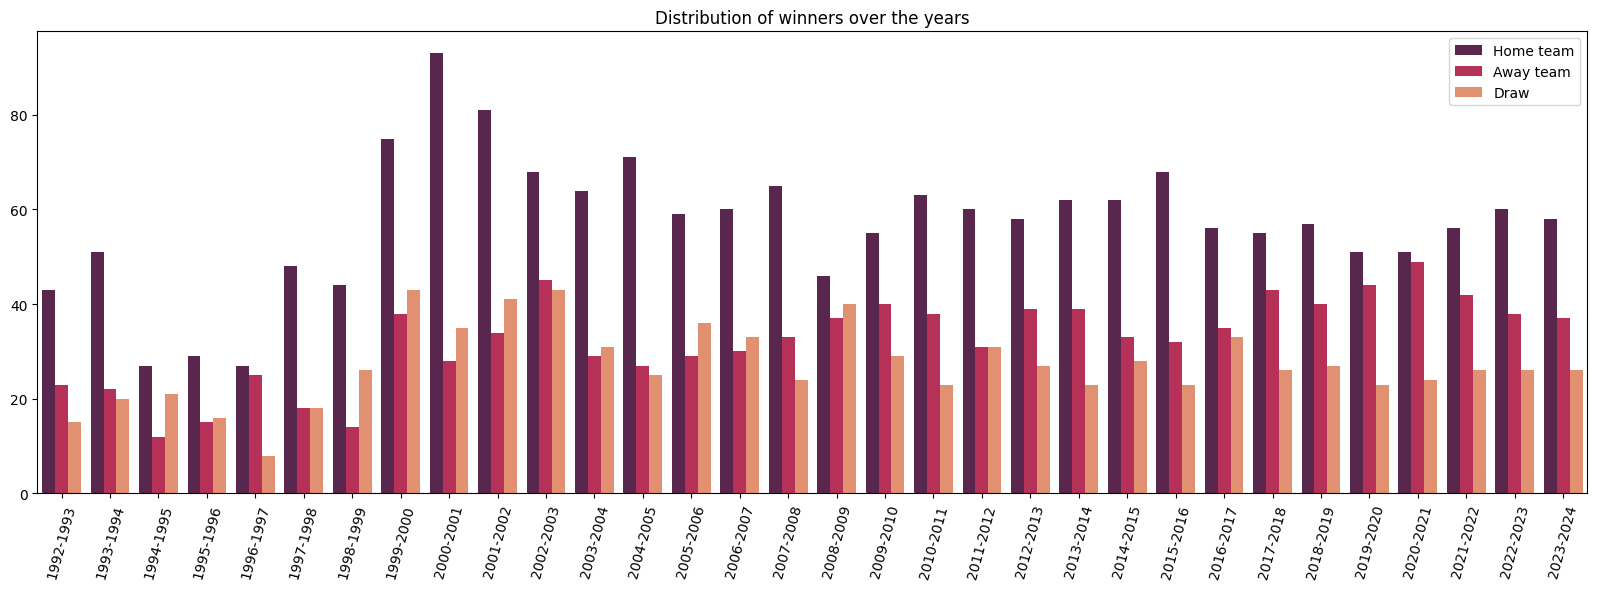

In [13]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x="Season", hue="Winner_Home_Away", palette="rocket")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=75)
plt.title("Distribution of winners over the years")
plt.legend(["Home team", "Away team", "Draw"])
plt.show()

Home teams have always dominated each season of champions league, however, during covid years the gap is small.

In [15]:
group_stage = df[df["Round"] == "Group stage"]
knockouts = df[df["Round"] != "Group stage"]

In [32]:
def get_stats(df, stage):
    home_or_away = df["Winner_Home_Away"].value_counts()
    home_wins = home_or_away.iloc[0]
    away_wins = home_or_away.iloc[1]
    draws = home_or_away.iloc[2]
    total = df.shape[0]
    print(f"In {stage} of champtions leage")
    print(
        f"Percentage of home wins = {round((home_wins/total)*100)}%"
    )
    print(
        f"Percentage of away wins = {round((away_wins/total)*100)}%"
    )
    print(
        f"Home team has a {round(((home_wins-away_wins)/away_wins)*100)}%"
        + f" chance of winning in {stage} compared to away team winning"
    )

In [33]:
get_stats(group_stage, "group stage")

In group stage of champtions leage
Percentage of home wins = 49%
Percentage of away wins = 28%
Home team has a 73% chance of winning in group stage compared to away team winning


In [34]:
get_stats(knockouts, "knockouts")

In knockouts of champtions leage
Percentage of home wins = 50%
Percentage of away wins = 27%
Home team has a 89% chance of winning in knockouts compared to away team winning


In Knockouts the chance of a home team winning becomes closer to 90%.

## Away Winners

In [80]:
def get_away_stats():
    away_winners = df[df["Winner_Home_Away"] == "Away"]
    mean_scored = np.round(np.mean(away_winners["Away_Score"]), 2)
    mean_conceded = np.round(np.mean(away_winners["Home_Score"]), 2)

    ## Getting average goals scored and conceded by winning away team
    print("Teams who won away matches:")
    print(f"Scored on average of {mean_scored} goals per match,")
    print(f"and conceded on average of {mean_conceded} goals per match.")

    goals_scored = away_winners["Away_Score"].value_counts()
    goal_conceded = away_winners["Home_Score"].value_counts()
    total = away_winners.shape[0]
    ## Getting percentage of wins is away team scores 1 or 2 goals
    atmost_two_scored = (
        np.round((goals_scored.iloc[0] + goals_scored.iloc[1]) / total, 2) * 100
    )
    ## Getting percentage of wins is away team concedes 0 or 1 goal
    atmost_one_conceded = (
        np.round((goal_conceded.iloc[0] + goal_conceded.iloc[1]) / total, 2) * 100
    )

    print(f"Away teams who scored one or two goals won {atmost_two_scored}% of times.")
    print(
        f"Away teams who conceded one or less goals won a staggering {atmost_one_conceded}% of times."
    )
    ## Plotting Goals Scored and Goals Conceded by winning away teams
    sns.countplot(data=away_winners, x="Away_Score", palette="rocket")
    plt.xlabel("")
    plt.ylabel("")
    plt.title("Away winners goals scored")
    plt.show()
    sns.countplot(data=away_winners, x="Home_Score", palette="rocket")
    plt.xlabel("")
    plt.ylabel("")
    plt.title("Away winners goals conceded")
    plt.show()

Teams who won away matches:
Scored on average of 2.4 goals per match,
and conceded on average of 0.54 goals per match.
Away teams who scored one or two goals won 61.0% of times.
Away teams who conceded one or less goals won a staggering 90.0% of times.


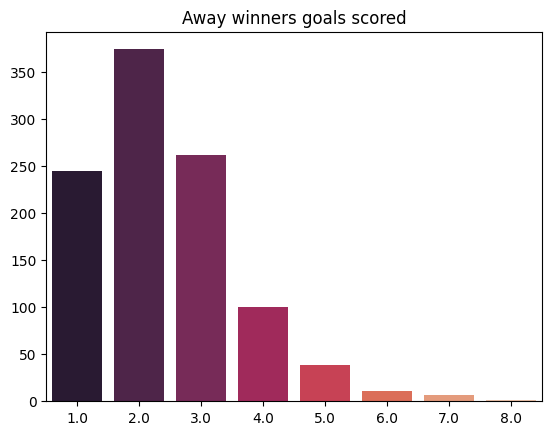

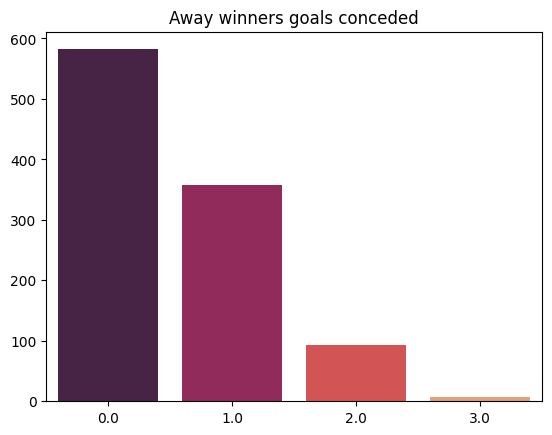

In [79]:
get_away_stats()

### **The Secret to Winning Away Matches**  

Winning away matches is often considered one of the toughest challenges in competitive sports. However, a closer look at the data reveals patterns that define successful teams on the road.  

1. **Defense Wins Matches**  
   These away-winning teams are also defensive powerhouses, conceding just 0.54 goals per match on average. Such resilience in defense minimizes the opposition’s chances, laying a strong foundation for victory. 

2. **Goals Make the Difference**  
   Teams that win away games show offensive prowess, scoring an average of 2.4 goals per match. This aggressive attacking approach ensures they can overcome the challenges of playing in hostile environments.  

3. **The Power of Key Metrics**  
   - When away teams scored **one or two goals**, they won **61% of the time**. This shows that consistent, even moderate, scoring can yield significant success.  
   - Defense, however, is the real game-changer: away teams that conceded **one or fewer goals** achieved a remarkable **90% win rate**.  

### **Key Takeaway**  
The data highlights a simple yet profound strategy for teams aiming for success in away games:  
- **Score at least one goal** to stay competitive.  
- **Prioritize a strong defensive setup** to dominate matches, as conceding fewer goals dramatically increases the chances of winning.  

Winning away isn’t just about talent—it’s about mastering the balance between offense and defense. For teams that can achieve this, victory is almost guaranteed.

In [85]:
away_winners = df[df["Winner_Home_Away"] == "Away"]
print("Top 5 teams who have won most matches on away ground (since 1992/93):")
print(away_winners["Winner_team"].value_counts()[:5])

Top 5 teams who have won most matches on away ground (since 1992/93):
Winner_team
Real Madrid       71
Bayern Munich     68
Barcelona         62
Manchester Utd    48
Chelsea           41
Name: count, dtype: int64
